In [1]:
!pip -q install --upgrade plotly

     |████████████████████████████████| 13.1MB 8.0MB/s 


 Table of Contents

 1. Loading Mers Dataset
 2.Graphical Analysis
 3.Future Prediction
 

1. Loading The Mers Dataset

In [2]:
import pandas as pd
import numpy as np
Mers = pd.read_csv("weekly_clean.csv")
Mers.head(10)

,Year,Week,Region,New Cases
0,2012,12,Other Countries,1
1,2012,12,Republic of Korea,0
2,2012,12,Saudi Arabia,0
3,2012,13,Other Countries,0
4,2012,13,Republic of Korea,0
5,2012,13,Saudi Arabia,0
6,2012,14,Other Countries,1
7,2012,14,Republic of Korea,0
8,2012,14,Saudi Arabia,0
9,2012,15,Other Countries,0


In [3]:
Year_wise = Mers.groupby(['Year'])['New Cases'].sum()
Year_wise = Year_wise.reset_index()
Year_wise.head(10)

,Year,New Cases
0,2012,9
1,2013,191
2,2014,748
3,2015,682
4,2016,257
5,2017,254
6,2018,142
7,2019,164


In [4]:
Week_wise = Mers.groupby(['Year', 'Week'])['New Cases'].sum()
Week_wise = Week_wise.reset_index()
Week_wise['index1'] = Week_wise.index
Week_wise.head(10)

,Year,Week,New Cases,index1
0,2012,12,1,0
1,2012,13,0,1
2,2012,14,1,2
3,2012,15,0,3
4,2012,16,0,4
5,2012,17,0,5
6,2012,18,0,6
7,2012,19,0,7
8,2012,20,0,8
9,2012,21,0,9


In [7]:
Week_wise.shape

(376, 4)

In [5]:
Year_wise.shape

(8, 2)

In [8]:
#importing country wise dataset
Country_wise = pd.read_csv('country_count_latest.csv')
Country_wise.head(10)


,Country,Confirmed
0,Algeria,2
1,Austria,2
2,Bahrain,1
3,China,1
4,Egypt,1
5,France,2
6,Germany,3
7,Greece,1
8,Iran,6
9,Italy,1


In [10]:
Country_wise.shape

(27, 2)

In [9]:
Country_wise.describe()

,Confirmed
count,27.000000
mean,90.703704
std,395.029679
min,1.000000
25%,1.500000
50%,2.000000
75%,5.500000
max,2058.000000


2. Graphical Analysis

In [11]:
# For basic level plotting
import matplotlib.pyplot as plt

# for advanced plotting
import seaborn as sns

# interactive plotting
import plotly.express as xp

# registering the converters
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters

# To generate graphs offline and to save them
import plotly
plotly.offline.init_notebook_mode(connected = True)


In [12]:
hover_data = ['Confirmed','Country']

fig =  xp.bar(Country_wise, x = 'Confirmed', y = 'Country', orientation = 'h', color = 'Country', 
                  text='Confirmed', title='Country vs Confirmed', width=700, hover_data = hover_data,
                  color_discrete_sequence = xp.colors.qualitative.Dark2)
fig.update_traces(textposition='auto')
fig.update_layout(xaxis_title="", yaxis_title="", showlegend=False)
fig.show()

In [ ]:


fig =  xp.bar(Week_wise, x = 'index1', y = 'New Cases', orientation = 'v', 
                  text='New Cases', title='Week vs Cases', width=700,
                  color_discrete_sequence = xp.colors.qualitative.Dark2)
fig.update_traces(textposition='auto')
fig.update_layout(xaxis_title="", yaxis_title="", showlegend=False)
fig.show()

In [13]:
demo = pd.read_csv('demographics.csv')
demo.head(10)

,Year,Number,Gender No. of male,No. of primary cases,No. of secondary cases,No. of unknown contact history,No. of HCW,No. of Fatal,Gender % of male,% of primary cases,% of secondary cases,% of unknown contact history,% of HCW,% of Fatal
0,2014,756,491.0,168.0,311.0,228.0,204.0,291.0,65.0,22.0,41.0,30.0,27.0,38.0
1,2015,677,486.0,78.0,318.0,123.0,96.0,227.0,72.0,12.0,47.0,18.0,14.0,34.0
2,2016,260,191.0,84.0,61.0,11.0,33.0,79.0,73.0,32.0,23.0,4.0,13.0,30.0
3,2017,247,185.0,76.0,90.0,8.0,45.0,67.0,75.0,31.0,36.0,3.0,18.0,27.0
4,2018,147,117.0,48.0,28.0,16.0,7.0,44.0,80.0,33.0,19.0,11.0,5.0,30.0
5,2019,218,167.0,69.0,92.0,1.0,24.0,53.0,77.0,32.0,42.0,0.0,11.0,24.0


In [14]:
fig = xp.sunburst(demo, path=['Year'], values='No. of Fatal',
                  color_discrete_sequence=['lightseagreen', 'orangered'], title='Year vs Fatalities')
fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [ ]:
fig = xp.sunburst(demo, path=['Year'], values='No. of HCW',
                  color_discrete_sequence=['lightseagreen', 'orangered'], title='Year vs HCW')
fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [ ]:
fig = xp.sunburst(demo, path=['Year'], values='No. of primary cases',
                  color_discrete_sequence=['lightseagreen', 'orangered'], title='Year vs Primary cases')
fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [ ]:
fig = xp.sunburst(demo, path=['Year'], values='No. of secondary cases',
                  color_discrete_sequence=['lightseagreen', 'orangered'], title='Year vs Secondary cases')
fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [ ]:
fig = xp.sunburst(demo, path=['Year'], values='No. of unknown contact history',
                  color_discrete_sequence=['lightseagreen', 'orangered'], title='Year vs Unknown contact')
fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [15]:
from  sklearn.svm import SVR


In [37]:
model=SVR(kernel = "sigmoid")


In [18]:
data = Week_wise['New Cases'].values
data

array([  1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         0,   0,   2,   1,   0,   1,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   2,   0,   3,   0,   0,   2,   1,   0,   0,   0,
         1,   0,   6,   9,   6,   4,   6,   5,   7,   5,   5,   6,  10,
         1,   4,   3,   4,   1,   3,  10,   6,   7,  12,   6,   6,   3,
         3,   4,   3,   5,   2,   4,   3,   2,   4,   2,   1,   7,   7,
         0,   0,   3,   1,   3,   1,   2,  10,   7,   7,  22,  12,  63,
        63,  73, 113,  99,  62,  30,  30,   8,  14,   6,   6,   7,   4,
         0,   0,   0,   0,   2,   0,   2,   1,   5,   1,   6,   4,   6,
         6,  15,  12,   7,   5,   4,   5,   5,   1,   3,   2,   5,   5,
         4,   7,   6,  13,  19,  25,  20,  17,  18,  10,   6,   7,   1,
         3,   1,   1,   9,   7,   9,  32,  37,  93,  40,  20,   9,   5,
         1,   6,   7,  15,  23,  30,  44,  43,  34,   8,  10,   

In [19]:
tr, te = data[:int(0.7*len(data))], data[int(0.7*len(data)):]
tr.shape, te.shape

((263,), (113,))

In [31]:
window = 4
seq_len = window + 1
sequences = []
for i in range(len(data) - seq_len):
    sequences.append(data[i:i+seq_len])

sequences = np.array(sequences)
X, Y = sequences[:, :-1], sequences[:, -1]

In [32]:
x_train, x_test, y_train, y_test = X[:int(0.7*len(X))], X[int(0.7*len(X)):], Y[:int(0.7*len(Y))], Y[int(0.7*len(Y)):]

In [33]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((257, 7), (257,), (111, 7), (111,))

In [38]:
model.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
pred = model.predict(x_test)

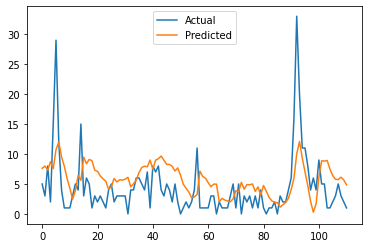

In [40]:
plt.plot(y_test)
plt.plot(pred)

plt.legend(['Actual', 'Predicted'])
plt.show()